In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import jovian

<IPython.core.display.Javascript object>

In [2]:
class ImageCompressionSVD:
    
    def __init__(self,img,p_dim = False):
        if len(img.shape) > 2:
            self.img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        else:
            self.img = img
        self.h , self.w = self.img.shape
        
        self.U, self.S, self.VT = np.linalg.svd(self.img, full_matrices=False)
        
        self.S_D = np.diag(self.S)
        self.S_n = self.S/np.sum(self.S_D)
        self.cumulativeSV = np.cumsum(self.S_n)
       
        if p_dim == True:
            print("Image Size : {} * {}". format(self.h, self.w))
            print("Dimention of U matrix : {}".format(self.U.shape))
            print("Dimention of S matrix : {}".format(self.S.shape))
            print("Dimention of Vt matrix : {}".format(self.VT.shape))
    
    def getImg(self, r = None):
        self.rr = r
        if self.rr == None:
            print("Error!! Enter the rank")
        else:
            Img = self.U[:,:self.rr]@self.S_D[:self.rr,:self.rr]@self.VT[:self.rr, :]
        return Img
    
    def plotSV(self): 
       

        plt.figure(figsize = (14,5))
        plt.subplot(1,2,1)
        plt.plot(self.cumulativeSV)
        plt.xlabel('singular values index')
        plt.ylabel('cumulative sum')

        plt.subplot(1,2,2)
        plt.plot(self.S)
        plt.xlabel('singular values index')
        plt.ylabel('singular values')
        plt.show()
    
    def rforCompress(self,percent = 50):
        self.percent = percent
        self.c_array = np.floor(self.cumulativeSV*100)
        self.result_array = np.where(self.c_array == self.percent)
        
        while len(self.result_array[0]) == 0:
            self.percent = self.percent + 1
            self.result_array = np.where(self.c_array == self.percent)
        else:
            self.result = np.amin(self.result_array[0])
            return print("For approx {} % energy retainment, select rank = {}".format(self.percent,self.result))
        return self.result_array
    
    def showLR(self, r = (5,10,50)):
        self.r1 = r[0]
        self.r2 = r[1]
        self.r3 = r[2]
        j = 1
        plt.figure(figsize = (15,15))
        for r in (0,self.r1, self.r2, self.r3):
            plt.subplot(2,2,j)
            if r == 0:
                img = plt.imshow(self.img)
                img.set_cmap('gray')
                plt.axis('off')
                plt.title('Original Image') 
                j = j+1
            else:
                Xapprox = self.U[:,:r]@self.S_D[:r,:r]@self.VT[:r, :]
                
                self.a,self.b = self.U[:,:r].shape
                self.c,self.d = self.S_D[:r,:r].shape
                self.e,self.f = self.VT[:r, :].shape
               
                self.new_size = self.a*self.b + self.c*self.d + self.e*self.f
                self.ori_size = self.h * self.w
                
                self.comp = ((self.ori_size - self.new_size)/self.ori_size) * 100
               
                img = plt.imshow(Xapprox)
                img.set_cmap('gray')
                #plt.axis('off')
                plt.title('r = {}'.format(r))
                plt.xlabel('Percentage compressed = {:.3f}'.format(self.comp))
               
                j = j+1
        plt.tight_layout()

In [22]:
img = cv2.imread("bird.jpg")

In [23]:
SVD = ImageCompressionSVD(img)

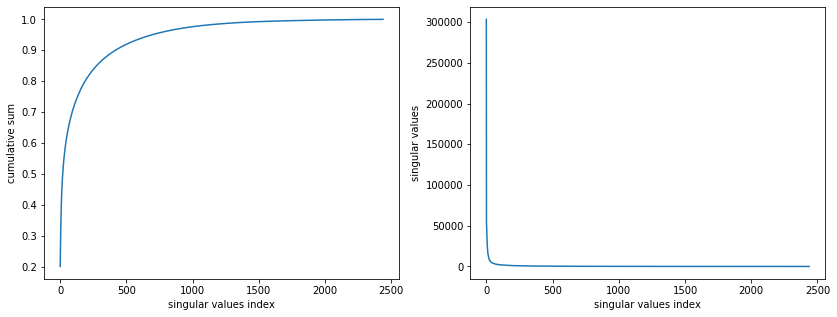

In [24]:
SVD.plotSV()

In [25]:
SVD.rforCompress(85)

For approx 85 % energy retainment, select rank = 275


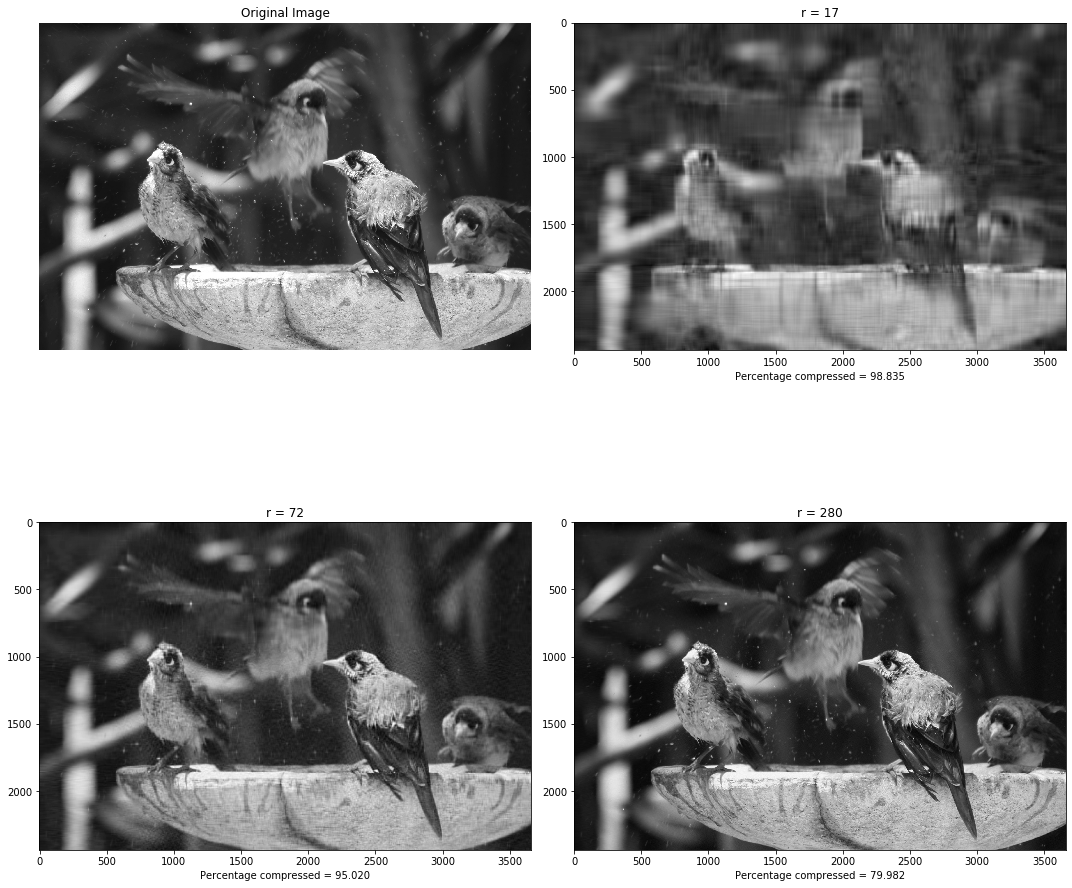

In [26]:
SVD.showLR(r = (17,72,280))

## RGB SVD Compression

In [19]:
class CompRGB_SVD(ImageCompressionSVD):
    def __init__(self,img,r=10):
        ig = []
        for i in cv2.split(img):
            ImageCompressionSVD.__init__(self,i)
            x = self.getImg(r)
            ig.append(x)   
        newI = cv2.merge((ig[0],ig[1],ig[2]))
        newI = newI/np.amax(newI)
        newI = np.clip(newI,0,1)
        print('Rank = {}'.format(r))
        plt.figure(figsize=(15,15))
        plt.subplot(1,2,1)
        plt.axis("off")
        plt.imshow(img[:,:,::-1])
        plt.title("Original")
        plt.subplot(1,2,2)
        plt.title("Compressed Reconstructed")
        plt.axis("off")
        plt.imshow(newI[:,:,::-1])
    def getCompressedI(self):
        return newI

In [27]:
imgg = cv2.imread("bird.jpg")

Rank = 90


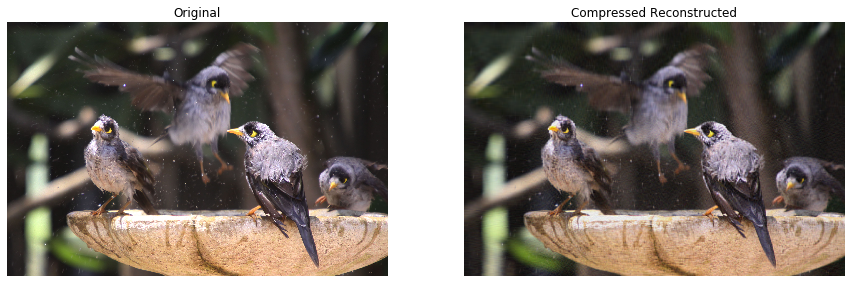

In [28]:
csvd = CompRGB_SVD(imgg,90)

In [29]:
csvd.rforCompress(90)

For approx 90 % energy retainment, select rank = 409


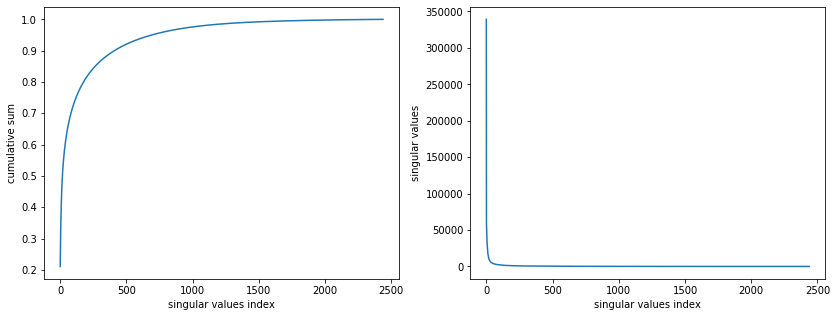

In [30]:
csvd.plotSV()

In [ ]:
SVD.showLR(r = (17,72,90))

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "girin-iitm/svd-image-compression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/girin-iitm/svd-image-compression


'https://jovian.ml/girin-iitm/svd-image-compression'